# **Import Library**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer


# **Upload Data**

In [ ]:
df= pd.read_csv('/content/titanic_dataset.csv', usecols =['Age', 'Fare', 'Survived'])

# **Check Missing Value**

In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

# **drop Missing value**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [ ]:
df.shape

(714, 3)

# **Divide the Data**

In [ ]:
X =df.iloc[:,1:]
y =df.iloc[:,0]

# **Train and Test Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.2 , random_state=42)

In [ ]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


# **Apply Decision Tree without Apply Disccreization**

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)

In [ ]:
accuracy_score (y_test, y_pred)

0.6363636363636364

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(), X,y,cv=10, scoring='accuracy'))

0.6331181533646322

# **Apply Discretization**

In [ ]:
kbin_age = KBinsDiscretizer(n_bins=22, encode='ordinal', strategy='quantile')
kbin_fare =KBinsDiscretizer(n_bins=22, encode= 'ordinal', strategy='quantile')

In [ ]:
trf =ColumnTransformer([
    ('first', kbin_age,[0]),
    ('second', kbin_fare,[1])
])

In [ ]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [ ]:
trf.named_transformers_['first'].n_bins_

array([22])

In [ ]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      ,  4.        , 12.81818182, 17.        , 18.        ,
              20.        , 22.        , 23.        , 24.        , 25.        ,
              27.        , 28.5       , 30.        , 31.        , 33.        ,
              35.        , 37.54545455, 40.        , 43.        , 47.        ,
              50.18181818, 58.        , 80.        ])                         ],
      dtype=object)

In [ ]:
trf.named_transformers_['second'].n_bins_

array([22])

In [ ]:
output =pd.DataFrame({
    'age' : X_train['Age'],
    'age_trf': X_train_trf[:,0],
    'fare' : X_train['Fare'],
    'fare_trf' : X_train_trf[:,1]

})

In [ ]:
output['age_labels'] =pd.cut(x=X_train['Age'],
                             bins=trf.named_transformers_['first'].bin_edges_[0].tolist())

output['fare_labels'] = pd.cut(x=X_train['Fare'],
                               bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [ ]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
286,30.0,12.0,9.50,6.0,"(28.5, 30.0]","(8.417, 9.674]"
211,35.0,15.0,21.00,12.0,"(33.0, 35.0]","(19.5, 25.987]"
604,35.0,15.0,26.55,14.0,"(33.0, 35.0]","(26.182, 27.75]"
134,25.0,9.0,13.00,9.0,"(24.0, 25.0]","(11.163, 13.0]"
178,30.0,12.0,13.00,9.0,"(28.5, 30.0]","(11.163, 13.0]"


In [ ]:
clf =DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 =clf.predict(X_test_trf)

In [ ]:
accuracy_score(y_test, y_pred2)

0.6153846153846154

In [ ]:
X_trf =trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X,y,cv=10, scoring='accuracy'))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


0.6303403755868544

In [ ]:
def discretize(bins, strategy):
  kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy= strategy)
  kbin_age = KBinsDiscretizer(n_bins=bins , encode= 'ordinal', strategy=strategy)

  trf = ColumnTransformer([
      ('first', kbin_age,[0]),
      ('second', kbin_age,[1])
  ])


  X_trf  =trf.fit_transform(X)
  print(np.mean(cross_val_score(DecisionTreeClassifier(), X,y, cv=10, scoring='accuracy' )))




  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(X['Age'])
  plt.title('Before')

  plt.subplot(122)
  plt.hist(X_trf[:,0],color= 'red')
  plt.title('After')

  plt.show()





  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(X['Fare'])
  plt.title('before')

  plt.subplot(122)
  plt.hist(X_trf[:,1],color="red" )
  plt.title('Fare')

  plt.show()


0.6219092331768387


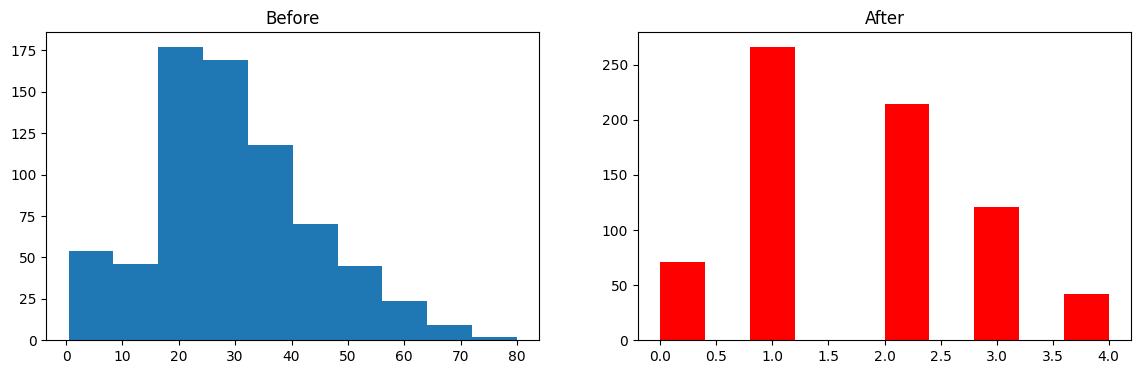

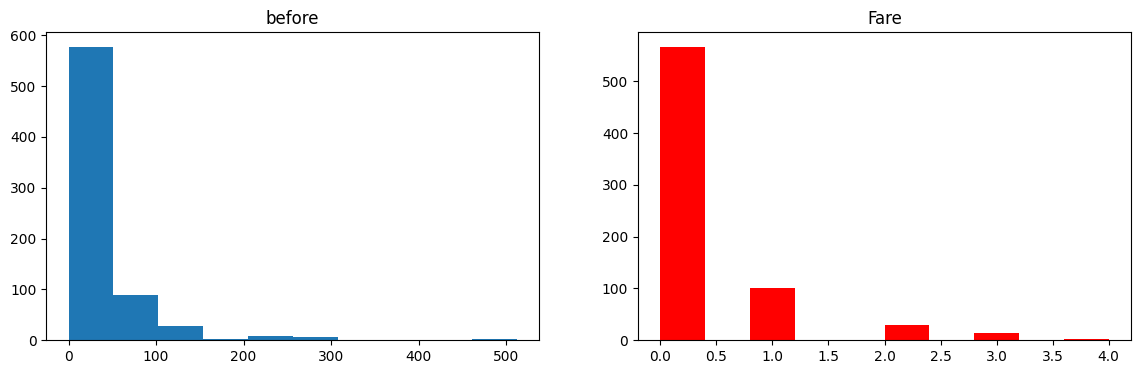

In [ ]:
discretize(5,'kmeans')